In [1]:
import topojson
from shapely import geometry
from shapely.ops import shared_paths
from shapely.ops import linemerge

In [127]:
# equal lines
# data = {
#     "abc1": {"type": "LineString", "coordinates": [[0, 0], [1.0, 0], [2.0, 0]]},
#     "abc2": {"type": "LineString", "coordinates": [[0, 0], [1.0, 0], [2.0, 0]]}
# } 

# # forward backward lines
# data = {
#     "abc3": {"type": "LineString", "coordinates": [(0, 0), (10, 0), (10, 5), (20, 5)]},
#     "abc4": {"type": "LineString", "coordinates": [(5, 0), (30, 0), (30, 5), (0, 5)]}
# } 

# # more than two lines
# data = {
#     "abc1": {"type": "LineString", "coordinates": [(0, 0), (15, 2.5), (30, 5)]},
#     "abc2": {"type": "LineString", "coordinates": [(0, 0), (15, 2.5), (30, 5)]},
#     "abc3": {"type": "LineString", "coordinates": [(0, 0), (10, 0), (10, 5), (20, 5)]},
#     "abc4": {"type": "LineString", "coordinates": [(5, 0), (30, 0), (30, 5), (0, 5)]}
# }

# # identical polygon
# data = {
#     "abca1": {"type": "Polygon", "coordinates": [[[0, 0], [1, 1], [2, 0], [0, 0]]]},
#     "abca2": {"type": "Polygon", "coordinates": [[[0, 0], [1, 1], [2, 0], [0, 0]]]}
# }

# reversed identical polygon
data = {
    "abca": {"type": "Polygon", "coordinates": [[[0, 0], [1, 1], [2, 0], [0, 0]]]},
    "acba": {"type": "Polygon", "coordinates": [[[0, 0], [2, 0], [1, 1], [0, 0]]]}
}

# invalid polygon geometry
data = {
    "wrong": {"type": "Polygon", "coordinates": [[[0, 0], [1, 0], [2, 0], [0, 0]]]},
    "valid": {"type": "Polygon", "coordinates": [[[0, 0], [2, 0], [1, 1], [0, 0]]]}
}

# multipolygon
data = {
    "foo": {
        "type": "MultiPolygon",
        "coordinates": [
            [
                [[0, 0], [20, 0], [10, 20], [0, 0]],
                [[6, 5], [10, 2], [14, 5], [10, 8], [6, 5]]
            ],           
            [
                [[25, 5], [30, 10], [35, 5], [25, 5]]
            ]
        ]
    }
}


In [128]:
join = topojson.join(topojson.extract(data))

TypeError: First geometry must be a LineString

In [129]:
join

{'type': 'Topology',
 'coordinates': [(0.0, 0.0),
  (20.0, 0.0),
  (10.0, 20.0),
  (0.0, 0.0),
  (25.0, 5.0),
  (30.0, 10.0),
  (35.0, 5.0),
  (25.0, 5.0)],
 'lines': [],
 'rings': [<shapely.geometry.polygon.Polygon at 0x11315ceb8>,
 'objects': {'foo': {'type': 'MultiPolygon', 'arcs': [0, 1]}},
 'junctions': []}

In [130]:
g1 = geometry.shape(data['foo'])

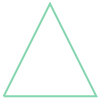

In [135]:
g1[0].exterior

In [132]:
g1.is_valid

True

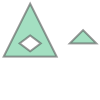

In [133]:
g1

In [134]:
topojson.extract(data)

{'type': 'Topology',
 'coordinates': [(0.0, 0.0),
  (20.0, 0.0),
  (10.0, 20.0),
  (0.0, 0.0),
  (25.0, 5.0),
  (30.0, 10.0),
  (35.0, 5.0),
  (25.0, 5.0)],
 'lines': [],
 'rings': [<shapely.geometry.polygon.Polygon at 0x11319de48>,
 'objects': {'foo': {'type': 'MultiPolygon', 'arcs': [0, 1]}}}

In [ ]:
warn_message

In [ ]:
fw, bw = shared_paths(g1, g2)

In [ ]:
g1.is_valid

In [ ]:
segments = list(fw)

In [ ]:
s_coords = [y for x in segments for y in list(x.coords)]
junctions = [i for i in s_coords if s_coords.count(i) is 1]

In [ ]:
s_coords

In [ ]:
junctions

In [ ]:
geometry.GeometryCollection([
    geometry.MultiLineString(join['lines']),
    geometry.MultiPolygon(join['rings']),
    geometry.MultiPoint(join['junctions'])    
])

In [ ]:
g1 = geometry.shape(data['abca1'])
g2 = geometry.shape(data['abca2'])

In [ ]:
extract['linearrings'] = [ring.boundary for ring in extract['rings']]
extract['mergerings'] = extract['linearrings'] + extract['rings']

In [ ]:
for ring in extract['rings']:
    print(ring)

In [ ]:
ring

In [ ]:
ring.boundary

In [ ]:
import itertools
line_combs = list(itertools.combinations(extract['rings'], 2))

In [ ]:
if line_combs[0][0] == geometry.Polygon:
    print('x')

In [ ]:
if isinstance(line_combs[0][0], geometry.Polygon):
    print('x')

In [ ]:
fw_bw = shared_paths(g1.boundary, g1.boundary)

In [ ]:
if not fw_bw.is_empty:
    print('im alive')

In [ ]:
?fw_bw[0]

In [ ]:
fw_bw[1]